In [117]:
import pandas as pd
import numpy as np
import os
import IPython.display as ipd
import librosa
import librosa.display
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

### EDA

In [8]:
audio1='6508-9-0-4.wav'

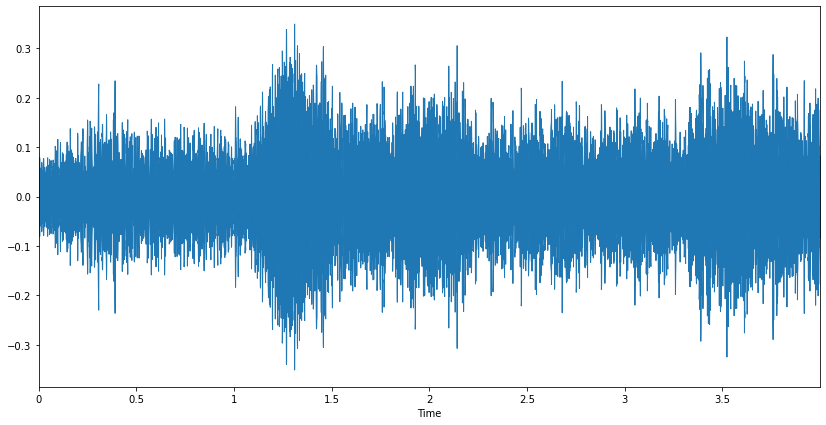

In [16]:
plt.figure(figsize=(14,7))
data1,sample_rate1=librosa.load(audio1)
librosa.display.waveplot(data1,sr=sample_rate1)
ipd.Audio(audio1)

In [18]:
sample_rate1

22050

In [20]:
data1

array([ 0.05088667,  0.07510009,  0.06540349, ..., -0.0507298 ,
       -0.06709649, -0.09151142], dtype=float32)

In [14]:
audio2='6902-2-0-4.wav'

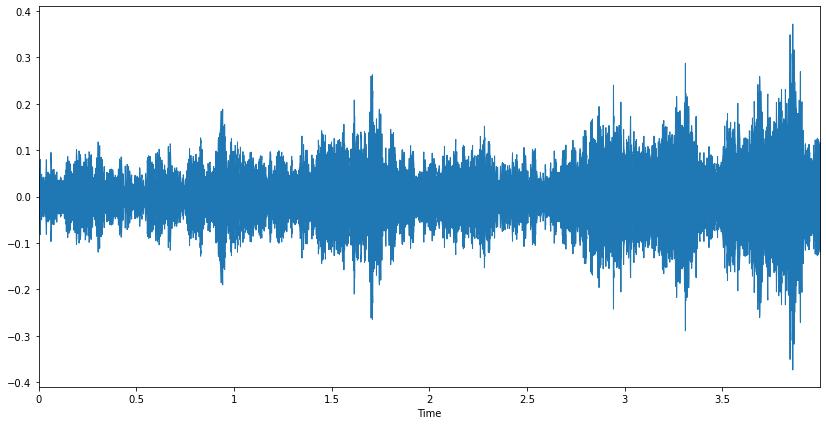

In [21]:
plt.figure(figsize=(14,7))
data2,sample_rate2=librosa.load(audio2)
librosa.display.waveplot(data2,sr=sample_rate2)
ipd.Audio(audio2)

In [29]:
sample_rate2

22050

In [22]:
data2 #With librosa, we obtain normalised values.

array([ 0.0211792 ,  0.02111816,  0.02296448, ..., -0.04811096,
       -0.02600098, -0.00306702], dtype=float32)

<b>Observation
    
Here Librosa converts the signal to mono, meaning the channel will always be 1

In [30]:
#Lets use scipy
from scipy.io import wavfile as wav
wave_sample,wave_data=wav.read(audio1)

In [31]:
wave_sample

44100

In [32]:
wave_data

array([[ 2469,  2043],
       [ 2443,  2110],
       [ 2420,  2141],
       ...,
       [-3313, -1786],
       [-3650, -1972],
       [-3814, -2320]], dtype=int16)

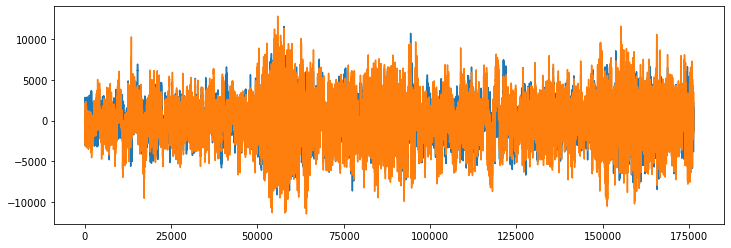

In [34]:
plt.figure(figsize=(12, 4))
plt.plot(wave_data)

<b> Here we can see that there are two channers where in Libosa we say only one channel

In [25]:
metadata=pd.read_csv('metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [26]:
metadata.isnull().sum()

slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
dtype: int64

In [28]:
metadata['class'].value_counts()

dog_bark            1000
air_conditioner     1000
drilling            1000
jackhammer          1000
children_playing    1000
street_music        1000
engine_idling       1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

<b>Extract Features

Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [35]:
mfcc=librosa.feature.mfcc(y=data2,sr=sample_rate2,n_mfcc=40)

In [36]:
mfcc

array([[-2.52553909e+02, -2.48936325e+02, -2.58941010e+02, ...,
        -1.72845734e+02, -1.73327911e+02, -1.73359818e+02],
       [ 1.06525574e+02,  1.08435013e+02,  1.14595566e+02, ...,
         1.13241913e+02,  1.23579742e+02,  1.26812355e+02],
       [-1.23207893e+01, -1.29521837e+01, -1.77558174e+01, ...,
        -7.58492889e+01, -6.01766052e+01, -4.59395409e+01],
       ...,
       [-6.62554932e+00, -6.75593472e+00, -3.86412835e+00, ...,
         7.17289639e+00,  5.82788038e+00,  6.21978188e+00],
       [ 2.47095203e+00,  3.50245714e-01,  6.88972175e-02, ...,
         5.53906059e+00, -2.50059390e+00, -5.74659109e+00],
       [-8.59767497e-01, -1.48059630e+00, -1.01706827e+00, ...,
        -9.39858437e-01, -1.45915151e-01, -5.13934898e+00]], dtype=float32)

In [37]:
mfcc.shape

(40, 173)

In [47]:
#### Extracting MFCC's For every audio file

audio_dataset_path='audio/'

In [51]:
def features_extractor(file):
    data,sampling_rate=librosa.load(file_name,res_type='kaiser_fast')
    mfcc_features=librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)
    mfcc_features_scaled=np.mean(mfcc_features.T,axis=0)
    return mfcc_features_scaled

In [52]:
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients

extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name=os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/'+str(row["slice_file_name"]))
    final_class_labels=row['class']
    after_preprocess=features_extractor(file_name)
    extracted_features.append([after_preprocess,final_class_labels])


3554it [02:43, 22.06it/s]C:\Users\John Joel\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8323it [06:02, 31.99it/s]C:\Users\John Joel\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
C:\Users\John Joel\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [06:19, 23.04it/s]


In [53]:
extracted_features

[[array([-2.1579301e+02,  7.1666122e+01, -1.3181377e+02, -5.2091331e+01,
         -2.2115967e+01, -2.1764179e+01, -1.1183746e+01,  1.8912683e+01,
          6.7266378e+00,  1.4556894e+01, -1.1782045e+01,  2.3010371e+00,
         -1.7251305e+01,  1.0052423e+01, -6.0094986e+00, -1.3153193e+00,
         -1.7693510e+01,  1.1171224e+00, -4.3699465e+00,  7.2629519e+00,
         -1.1815971e+01, -7.4952617e+00,  5.4577127e+00, -2.9442451e+00,
         -5.8693881e+00, -9.8653995e-02, -3.2121704e+00,  4.6092515e+00,
         -5.8293281e+00, -5.3475075e+00,  1.3341197e+00,  7.1307817e+00,
         -7.9450868e-02,  1.7109251e+00, -5.6942000e+00, -2.9041710e+00,
          3.0366952e+00, -1.6827594e+00, -8.8585865e-01,  3.5438946e-01],
        dtype=float32),
  'dog_bark'],
 [array([-4.2468677e+02,  1.1056227e+02, -5.4148235e+01,  6.2010738e+01,
         -7.0951587e-01,  1.8157396e+01,  1.4451563e+00,  1.1161131e+01,
         -1.7058901e+00,  1.2360451e+01, -1.1055476e+01,  2.0736567e+01,
         -8

In [55]:
len(extracted_features)

8732

In [57]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['features','class'])

In [58]:
extracted_features_df.head()

,features,class
0,"[-215.79301, 71.66612, -131.81377, -52.09133, ...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265697,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.60859, 1.6...",children_playing


In [63]:
X=np.array(extracted_features_df['features'].tolist())
Y=np.array(extracted_features_df['class'].tolist())

In [62]:
X

array([[-2.15793015e+02,  7.16661224e+01, -1.31813766e+02, ...,
        -1.68275940e+00, -8.85858655e-01,  3.54389459e-01],
       [-4.24686768e+02,  1.10562271e+02, -5.41482353e+01, ...,
         6.17408693e-01, -6.84974074e-01,  5.71514547e-01],
       [-4.59564667e+02,  1.22800354e+02, -4.79247093e+01, ...,
         2.22541404e+00,  1.54661798e+00, -8.36315691e-01],
       ...,
       [-3.04613159e+02,  1.12619904e+02, -4.71619453e+01, ...,
        -3.03358078e+00,  2.71057296e+00,  7.67189503e+00],
       [-3.44714233e+02,  1.26758133e+02, -5.61771698e+01, ...,
        -7.80225849e+00, -1.77907360e+00,  5.83541918e+00],
       [-3.15933838e+02,  9.56758881e+01, -3.80477676e+01, ...,
         5.77580512e-01, -1.14637651e+01, -5.96535397e+00]], dtype=float32)

In [64]:
X.shape

(8732, 40)

In [65]:
Y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [66]:
Y.shape

(8732,)

In [68]:
### Label Encoding

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
Y=to_categorical(label.fit_transform(Y))

In [69]:
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [70]:
Y.shape

(8732, 10)

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [81]:
X_train

array([[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
         3.3314774e+00, -1.4786110e+00,  2.8736601e+00],
       [-1.4074219e+01,  9.1916939e+01, -8.6787224e+00, ...,
        -3.3844023e+00, -5.2119045e+00, -1.5936135e+00],
       [-4.9532028e+01,  1.5521857e-01, -2.0369110e+01, ...,
         2.0491767e+00, -8.0537474e-01,  2.7793026e+00],
       ...,
       [-4.2699332e+02,  9.2890656e+01,  3.0233388e+00, ...,
         8.6335993e-01,  6.4766794e-01,  7.8490514e-01],
       [-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
         1.3777872e+00, -1.9530845e+00, -8.9652145e-01],
       [-4.2167450e+02,  2.1169032e+02,  2.6820307e+00, ...,
        -5.1484952e+00, -3.6400859e+00, -1.3321609e+00]], dtype=float32)

In [73]:
X_train.shape

(6985, 40)

In [79]:
Y_train.shape

(6985, 10)

## Model

In [76]:
import tensorflow as tf
from tensorflow import keras

In [77]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Activation

In [78]:
from tensorflow.keras.optimizers import Adam

In [80]:
labels=Y.shape[1] #We have 10 differnt classes

10

In [87]:
model=Sequential()

model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
    
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
    
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
    
model.add(Dense(labels))
model.add(Activation('softmax'))



In [88]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_5 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)              

In [89]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [92]:
epochs=200
batchsize=32
model.fit(X_train,Y_train,epochs=epochs,batch_size=batchsize,validation_data=(X_test, Y_test), verbose=1)

Epoch 1/200
219/219 [==============================] - 0s 2ms/step - loss: 11.1698 - accuracy: 0.1254 - val_loss: 2.2941 - val_accuracy: 0.1070
Epoch 2/200
219/219 [==============================] - 0s 1ms/step - loss: 2.5440 - accuracy: 0.1137 - val_loss: 2.2826 - val_accuracy: 0.1070
Epoch 3/200
219/219 [==============================] - 0s 1ms/step - loss: 2.3596 - accuracy: 0.1148 - val_loss: 2.2755 - val_accuracy: 0.1088
Epoch 4/200
219/219 [==============================] - 0s 1ms/step - loss: 2.2952 - accuracy: 0.1148 - val_loss: 2.2632 - val_accuracy: 0.1173
Epoch 5/200
219/219 [==============================] - 0s 1ms/step - loss: 2.2696 - accuracy: 0.1290 - val_loss: 2.2385 - val_accuracy: 0.1305
Epoch 6/200
219/219 [==============================] - 0s 1ms/step - loss: 2.2377 - accuracy: 0.1466 - val_loss: 2.1993 - val_accuracy: 0.1586
Epoch 7/200
219/219 [==============================] - 0s 1ms/step - loss: 2.2141 - accuracy: 0.1601 - val_loss: 2.1478 - val_accuracy: 0.174

Epoch 58/200
219/219 [==============================] - 0s 2ms/step - loss: 1.1264 - accuracy: 0.6230 - val_loss: 0.9622 - val_accuracy: 0.6915
Epoch 59/200
219/219 [==============================] - 0s 1ms/step - loss: 1.1006 - accuracy: 0.6230 - val_loss: 0.9146 - val_accuracy: 0.7104
Epoch 60/200
219/219 [==============================] - 0s 1ms/step - loss: 1.0873 - accuracy: 0.6295 - val_loss: 0.9041 - val_accuracy: 0.7230
Epoch 61/200
219/219 [==============================] - 0s 2ms/step - loss: 1.0749 - accuracy: 0.6324 - val_loss: 0.9182 - val_accuracy: 0.7041
Epoch 62/200
219/219 [==============================] - 0s 1ms/step - loss: 1.0686 - accuracy: 0.6368 - val_loss: 0.8999 - val_accuracy: 0.7092
Epoch 63/200
219/219 [==============================] - 0s 2ms/step - loss: 1.0760 - accuracy: 0.6358 - val_loss: 0.8998 - val_accuracy: 0.7149
Epoch 64/200
219/219 [==============================] - 0s 2ms/step - loss: 1.0680 - accuracy: 0.6417 - val_loss: 0.8952 - val_accuracy:

Epoch 115/200
219/219 [==============================] - 0s 2ms/step - loss: 0.9551 - accuracy: 0.6829 - val_loss: 0.8035 - val_accuracy: 0.7424
Epoch 116/200
219/219 [==============================] - 0s 2ms/step - loss: 0.9652 - accuracy: 0.6764 - val_loss: 0.7893 - val_accuracy: 0.7607
Epoch 117/200
219/219 [==============================] - 0s 2ms/step - loss: 0.9495 - accuracy: 0.6770 - val_loss: 0.7748 - val_accuracy: 0.7602
Epoch 118/200
219/219 [==============================] - 0s 2ms/step - loss: 0.9373 - accuracy: 0.6892 - val_loss: 0.7783 - val_accuracy: 0.7653
Epoch 119/200
219/219 [==============================] - 0s 2ms/step - loss: 0.9447 - accuracy: 0.6796 - val_loss: 0.7638 - val_accuracy: 0.7642
Epoch 120/200
219/219 [==============================] - 0s 1ms/step - loss: 0.9722 - accuracy: 0.6782 - val_loss: 0.8006 - val_accuracy: 0.7550
Epoch 121/200
219/219 [==============================] - 0s 2ms/step - loss: 0.9408 - accuracy: 0.6858 - val_loss: 0.7552 - val_ac

219/219 [==============================] - 0s 2ms/step - loss: 0.8926 - accuracy: 0.6978 - val_loss: 0.7305 - val_accuracy: 0.7762
Epoch 172/200
219/219 [==============================] - 0s 2ms/step - loss: 0.8917 - accuracy: 0.7052 - val_loss: 0.7475 - val_accuracy: 0.7762
Epoch 173/200
219/219 [==============================] - 0s 2ms/step - loss: 0.9182 - accuracy: 0.6975 - val_loss: 0.7300 - val_accuracy: 0.7779
Epoch 174/200
219/219 [==============================] - 0s 2ms/step - loss: 0.8912 - accuracy: 0.7035 - val_loss: 0.7265 - val_accuracy: 0.7762
Epoch 175/200
219/219 [==============================] - 0s 2ms/step - loss: 0.8893 - accuracy: 0.7047 - val_loss: 0.7336 - val_accuracy: 0.7630
Epoch 176/200
219/219 [==============================] - 0s 2ms/step - loss: 0.8927 - accuracy: 0.6969 - val_loss: 0.7440 - val_accuracy: 0.7630
Epoch 177/200
219/219 [==============================] - 0s 2ms/step - loss: 0.8760 - accuracy: 0.7038 - val_loss: 0.7170 - val_accuracy: 0.7836

In [96]:
accuracy=model.evaluate(X_test,Y_test,verbose=0)
print(accuracy[1])

0.7767601609230042


In [98]:
X_test[1]

array([-466.1843    ,    1.5388241 ,  -34.397354  ,   35.715332  ,
        -15.166928  ,  -18.850811  ,   -0.74158096,  -15.999888  ,
        -21.354334  ,    7.6506834 ,  -29.031446  ,  -19.142824  ,
         -2.6798902 ,   -8.466882  ,  -14.7660475 ,   -7.004777  ,
         -7.103752  ,    8.887754  ,   14.911873  ,   21.47102   ,
         21.336624  ,    0.9169526 ,  -18.795403  ,   -5.00172   ,
         -0.70152587,    2.9139898 ,   -6.710598  ,  -16.638536  ,
         -9.821647  ,   12.861958  ,    0.6552981 ,  -23.953394  ,
        -15.200551  ,    9.21079   ,   10.419799  ,   -0.57916105,
         -1.2440339 ,   17.722294  ,   13.837573  ,   -5.164347  ],
      dtype=float32)

In [99]:
model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([5, 4, 4, ..., 1, 2, 2], dtype=int64)

<b>Testing Some Test Audio Data

Steps

<b>Preprocess the new audio data
    
<b>predict the classes
    
<b>Invere transform your Predicted Label

In [112]:
audio1='6508-9-0-4.wav'

In [100]:
# Now we will classify using our model

# 1.Preprocessing the new audio data

data_s,sample_rate=librosa.load(audio1,res_type='kaiser_fast')
mfccs=librosa.feature.mfcc(y=data_s,sr=sample_rate,n_mfcc=40)
mfccs_scaled=np.mean(mfccs.T,axis=0)
print(mfccs_scaled)

[-2.0058147e+02  1.6355887e+02 -2.7270754e+01  5.5193039e+01
 -1.3137210e+01  1.9692183e+01 -7.7572980e+00  5.9652629e+00
 -8.2713022e+00  5.4081464e+00  4.2993917e+00 -2.8658297e+00
  9.3189182e+00 -3.6965487e+00  6.9585681e+00  9.8174584e-01
  4.5882730e+00  2.3274620e+00  3.4491553e+00  4.7754211e+00
 -5.6897527e-01 -6.8858261e-03 -1.6858741e+00  1.8901646e+00
 -3.2779646e+00 -5.8132970e-01 -4.6759000e+00 -1.6987592e+00
  6.3903403e-01  8.5547101e-01 -2.7534182e+00 -2.5171244e+00
 -1.3670744e+00  4.9570225e-02  2.1521912e+00  6.2343266e-02
  2.7928958e+00 -1.7912248e+00 -1.4227813e+00 -4.0337462e+00]


In [101]:
mfccs_scaled=mfccs_scaled.reshape(1,-1)
mfccs_scaled.shape

(1, 40)

In [104]:
# 2.Predict the classes

predicted_label=model.predict_classes(mfccs_scaled)
print(predicted_label)

[9]


In [107]:
predicted_class=label.inverse_transform(predicted_label)
predicted_class

array(['street_music'], dtype='<U16')

In [113]:
audio2='6902-2-0-4.wav'

In [111]:
data_s,sample_rate=librosa.load(audio2,res_type='kaiser_fast')
mfccs=librosa.feature.mfcc(y=data_s,sr=sample_rate,n_mfcc=40)
mfccs_scaled=np.mean(mfccs.T,axis=0)
# print(mfccs_scaled)
mfccs_scaled=mfccs_scaled.reshape(1,-1)
predicted_label=model.predict_classes(mfccs_scaled)
# print(predicted_label)
predicted_class=label.inverse_transform(predicted_label)
predicted_class

array(['children_playing'], dtype='<U16')